In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error

In [ ]:
df = pd.read_csv('/content/Wholesale customers data.csv', index_col=0)
df.index = pd.to_datetime(df.index)

In [ ]:
X=df.values
print('Shape of data /t',df.shape)
print('Original Dataset:\n',df.head())
print('After Extracting only temperatures:\n',X)

Shape of data /t (440, 7)
Original Dataset:
                                Region  Fresh  Milk  Grocery  Frozen  \
Channel                                                               
1970-01-01 00:00:00.000000002       3  12669  9656     7561     214   
1970-01-01 00:00:00.000000002       3   7057  9810     9568    1762   
1970-01-01 00:00:00.000000002       3   6353  8808     7684    2405   
1970-01-01 00:00:00.000000001       3  13265  1196     4221    6404   
1970-01-01 00:00:00.000000002       3  22615  5410     7198    3915   

                               Detergents_Paper  Delicassen  
Channel                                                      
1970-01-01 00:00:00.000000002              2674        1338  
1970-01-01 00:00:00.000000002              3293        1776  
1970-01-01 00:00:00.000000002              3516        7844  
1970-01-01 00:00:00.000000001               507        1788  
1970-01-01 00:00:00.000000002              1777        5185  
After Extracting only t

<Axes: xlabel='Channel'>

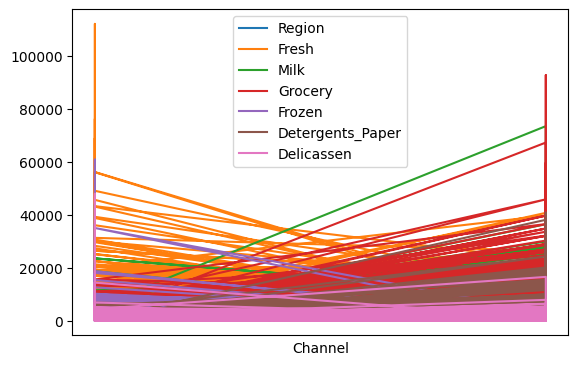

In [ ]:
df.plot()

<Axes: xlabel='Channel'>

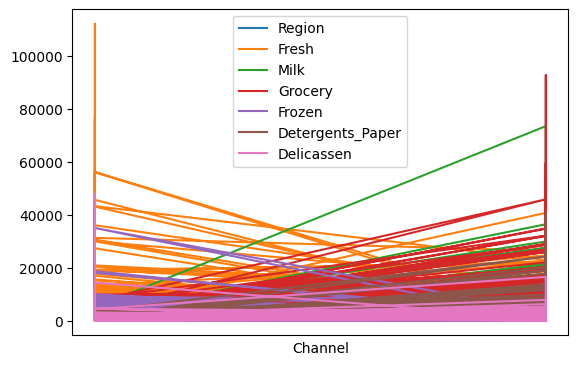

In [ ]:
df[:200].plot()

In [ ]:
from statsmodels.tsa.stattools import adfuller

print(df.columns)

temperature_column = 'Fresh'

dftest = adfuller(df[temperature_column], autolag='AIC')

print("1. ADF : ", dftest[0])
print("2. P-Value :", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Usd for ADF Regression andd critical values Calculation : ", dftest[3])
print("5. Critical Values : ",)
for key, val in dftest[4].items():
    print("\t", key, ": ", val)

Index(['Region', 'Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper',
       'Delicassen'],
      dtype='object')
1. ADF :  -12.478640731844546
2. P-Value : 3.127184878472941e-23
3. Num Of Lags :  1
4. Num Of Observations Usd for ADF Regression andd critical values Calculation :  438
5. Critical Values : 
	 1% :  -3.445368352170937
	 5% :  -2.8681614049724002
	 10% :  -2.570296970872167


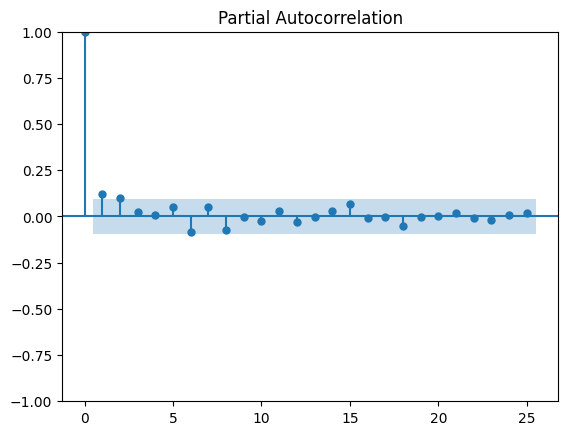

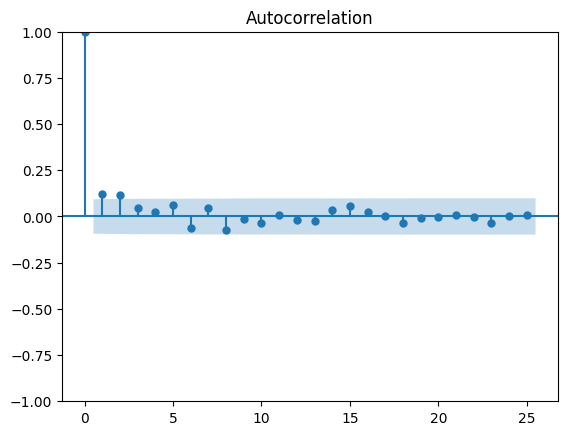

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

pacf=plot_pacf(df['Fresh'],lags=25)
acf=plot_acf(df['Fresh'],lags=25)

In [ ]:
train=X[:len(X)-7]
test=X[len(X)-7:]

In [ ]:
train_fresh = df['Fresh'][:len(df) - 7].values
test_fresh = df['Fresh'][len(df) - 7:].values

model = AutoReg(train_fresh, lags=10)
model_fit = model.fit()

In [ ]:
model_fit = model.fit()
print(model_fit.summary())

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                  433
Model:                    AutoReg(10)   Log Likelihood               -4589.253
Method:               Conditional MLE   S.D. of innovations          12460.992
Date:                Sun, 30 Mar 2025   AIC                           9202.505
Time:                        10:10:20   BIC                           9251.074
Sample:                            10   HQIC                          9221.696
                                  433                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       9888.7702   1586.416      6.233      0.000    6779.453     1.3e+04
y.L1           0.1126      0.049      2.316      0.021       0.017       0.208
y.L2           0.0882      0.049      1.802      0.0

In [ ]:
print(len(train))

433


In [ ]:
print(len(test))

7


In [ ]:
pred = model_fit.predict(start=len(train), end=len(train) + len(test) - 1, dynamic=False)

In [ ]:
print(len(pred))

7


In [ ]:
print(len(test))

7


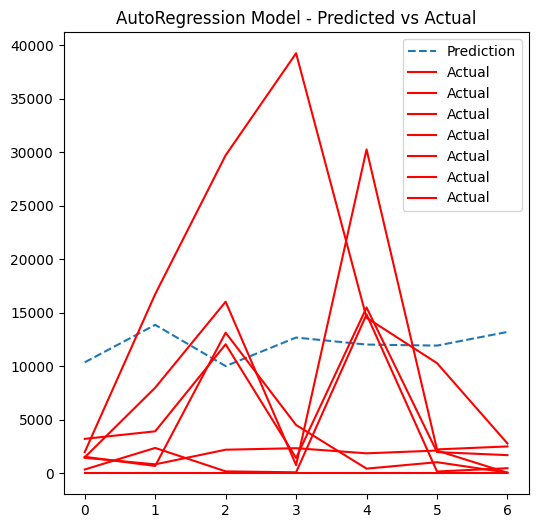

[10364.64162914 13865.95184149 10014.34856906 12679.90383899
 12023.17545895 11927.29018053 13203.78894191]


In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.plot(pred, label='Prediction', linestyle='dashed')
plt.plot(test, label='Actual', linestyle='solid', color='red')
plt.legend()
plt.title('AutoRegression Model - Predicted vs Actual')
plt.show()

print(pred)

In [ ]:
print(pred)

[10364.64162914 13865.95184149 10014.34856906 12679.90383899
 12023.17545895 11927.29018053 13203.78894191]


In [ ]:
print(test)

[[    3  1982  3218  1493  1541   356  1449]
 [    3 16731  3922  7994   688  2371   838]
 [    3 29703 12051 16027 13135   182  2204]
 [    3 39228  1431   764  4510    93  2346]
 [    3 14531 15488 30243   437 14841  1867]
 [    3 10290  1981  2232  1038   168  2125]
 [    3  2787  1698  2510    65   477    52]]


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

test_fresh = test[:, df.columns.get_loc('Fresh')]

mae = mean_absolute_error(test_fresh, pred)
mse = mean_squared_error(test_fresh, pred)
rmse = np.sqrt(mse)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")

MAE: 10292.334434727964
MSE: 184057283.0715227
RMSE: 13566.771283968883


In [ ]:
test.shape

(7, 7)

In [ ]:
pred.shape

(7,)

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
rmse = np.sqrt(mean_squared_error(test_fresh, pred))

In [ ]:
pred_future=model_fit.predict(start=len(X),end=len(X)+6,dynamic=False)

print("The Future prediction for the next week")
print(pred_future)
print("Number of Prediction Made:",len(pred_future))


The Future prediction for the next week
[11317.57708563 12446.43920429 11462.63102543 12156.93481657
 11950.73500904 11878.66880466 12099.1914206 ]
Number of Prediction Made: 7


In [ ]:
print('Number of Predictions Made:', len(pred_future))

Number of Predictions Made: 7
